## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

# Dynamical Systems

## What is a dynamical system?

**Reference:** *Dinámica Clásica*, Antonio Fernandez Rañada. Chapter 2.

> Any set of any nature, whose state can be described by various quantities that vary over time.

<img src="img/dynamical_systems_examples.png" alt="Dynamical systems examples" width="500" height="500" />

In order to strictly define a dynamical system we must:

- Define the **state variables**

> A **state variable** is one of the set of variables that are used to describe the **mathematical "state"** of a dynamical system. Intuitively, the state of a system describes enough about the system to **determine** its future behaviour in the absence of any external forces affecting the system.

$$ \underbrace{x, y, z, ...}_{\text{State variables}} := \{ q_{i} \}$$

- Define the **mathematical model**, also referred as **evolution equations** or **equations of motion**

> The **equations of motion** states how the system evolves as time goes by.

$$ \Delta x = f_{1} (x, y, z, ...; t) $$

$$ \Delta y = f_{2} (x, y, z, ...; t) $$

$$ \Delta z = f_{3} (x, y, z, ...; t) $$

$$ \vdots $$

## Determinism and predictability

It is possible to demonstrate that the equations of motion have a single solution as long as there exists prescribed initial data.

> By the [existence and uniqueness theorem](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem) one can asure that trajectories in **phase space** do not intersect.

In this sense, the state $\{ q_{i} (t_{0}) \}$ of a system at any time $t_{0}$ completely determines the solution $\{ q_{i} (t_{0}) \}$ for any time $t$.

**Note:**

> In dynamical system theory, a **phase space** is a space in which all possible states of a system are represented, with each possible state corresponding to one unique point in the phase space. For **mechanical systems**, the **phase space** usually consists of all possible values of position and momentum variables. So, **phase space** differs from **configuration space** in that the latter refers to the space spanned by all generalized coordinates, but **phase space** also incorporates information about momentum variables.

> There exists another construction named [phase portrait](https://en.wikipedia.org/wiki/Phase_portrait) which is a geometric representation of the trajectories of a dynamical system in the **phase plane** (corresponding to the **phase space** for one generalized coordinate and its derivative). Each set of initial conditions is represented by a different curve, or point. **Phase portrait** can also be used for two coordinates plotting the corresponding velocity field at each point.

### Determinism

> A **deterministic system** is a system in which the later states of the system follow from, or
are determined by, the earlier ones

i.e. the **equations of motion** (mathematical rules) are completely determined. Such a system contrasts with a **stochastic** or **random system** in which future states are not determined from previous ones. An example of a stochastic system would be the sequence of heads or tails of an unbiased coin, or radioactive decay.

#### Caution:

> If a system is deterministic, this doesn't necessarily imply that later states of the system are
**predictable** from a knowledge of the earlier ones.

### ... Chaos enters to scene

**Reference:** *NONLINEAR DYNAMICS AND CHAOS: WITH APPLICATIONS TO PHYSICS, BIOLOGY, CHEMISTRY*. STROGATZ, STEVEN H. Section 9.3 - Chaos on a strange attractor.

No definition of the term **chaos** is universally accepted yet, but almost everyone would agree on the three ingredients used in the following working definition:

> **Chaos** is aperiodic long-term behavior in a deterministic system that exhibits sensitive dependence on initial conditions.

1. **Aperiodic long-term behavior** means that there are trajectories which do not settle down to fixed points, periodic orbits, or quasiperiodic orbits as $t \to \infty$ .

For practical reasons, we should require that such trajectories are not too rare. For instance, we could insist that there be an open set of initial conditions leading to aperiodic trajectories, or perhaps that such trajectories should occur with nonzero probability, given a random initial condition.


2. **Deterministic** means that the system has no random or noisy inputs or parameters. The irregular behavior arises from the system's nonlinearity, rather than from noisy driving forces.


3. **Sensitive dependence on initial conditions** means that nearby trajectories separate exponentially fast.

---

In general, systems with **chaotic behaviour** often show the existence of an **strange attractor** in phase space.

An **attractor** is a closed set $A$ with the following properties:

1. $A$ is an invariant set

> Any trajectory $\vec{x}(t)$ that starts in $A$ stays in $A$ for all time.

2. $A$ attracts an open set of initial conditions

> There is an open set $U$ containing $A$ such that if $\vec{x}(t_{0}) \in U$, then the distance from $\vec{x}(t)$ to $A$ tends to zero as $t \to \infty$. This means that $A$ attracts all trajectories that start sufficiently close to it. The largest such $U$ is called the basin of attraction of $A$.

3. $A$ is minimal

> There is no proper subset of $A$ that satisfies conditions **1** and **2**.

We define a **strange attractor** to be an attractor that exhibits sensitive dependence on initial conditions. **Strange attractors** were originally called strange because they are often **fractal sets**. 

<img src="img/chaotic_fractal_set_1.gif" alt="Chaotic fractal set 1" width="500" height="500" />

<img src="img/chaotic_fractal_set_2.gif" alt="Chaotic fractal set 2" width="400" height="400" />

Nowadays this geometric property is regarded as less important than the dynamical property of sensitive dependence on initial conditions.

### Exponential Divergence of Nearby Trajectories

The motion on the attractor exhibits sensitive dependence on initial conditions.

This means that two trajectories starting very close together will rapidly diverge from each other, and thereafter have totally different futures.

<img src="img/spread_in_phase_space.png" alt="spread in phase space" width="400" />

Hence nearby trajectories can end up anywhere on the attractor.

The practical implication is that long-term prediction becomes impossible in a system like this, where **small uncertainties are amplified enormously fast**.

Suppose that we let transients decay, so that a trajectory is "on" the attractor. Suppose $\vec{x}(t)$ is a point on the attractor at time $t$, and consider a nearby point, say $\vec{x}(t) + \delta (t)$, where $\delta$ is a tiny separation vector of initial length $\| \delta_{0} \|$:

<img src="img/initial_separation.png" alt="initial separation" width="400" />

In numerical studies, one finds that

$$ \| \delta (t) \| \sim \| \delta_{0} \| e^{\lambda \, t}$$

Hence neighboring trajectories separate exponentially fast. Equivalently, if we plot $\ln \| \delta (t) \|$ versus $t$, we find a curve that is close to a straight line with a positive slope of $\lambda$

<img src="img/initial_separation_log.png" alt="log initial separation" width="400" />

When a system has a **positive Lyapunov exponent**, there is a **time horizon** beyond which prediction breaks down:

<img src="img/time_horizon.png" alt="time horizon" width="400" />

### Predictability

**Reference:** *Practical Numerical Algorithms for Chaotic Systems*. Parker, Thomas S., Chua, Leon. Section 1.2.5 - Predictive Power.

<img src="img/predictability.png" alt="Predictability" width="450" height="450" />

Consider two observers observing a dynamical system. Observer $A$ observes the system at time $t_{1}$ and observer $B$ at time $t_{2} > t_{1}$. The uncertainty of observation is the same for each observer.

Furthermore, given an initial condition at $t_{1}$, observer $A$ can predict the state at $t_{2}$ with infinite precision, that is, the only error is due to the imprecise observation of the initial condition.

The question is: **Which observer knows more precisely the state at time $t_{2}$, observer $A$ using observation plus prediction or observer $B$ using only observation?**

>If observer $A$ knows more precisely the state at $t_{2}$, the system is said to be predictive.

For a  predictive system, earlier observations convey more information than later ones. In other words, predictions are more accurate than observations. Information is destroyed in predictive systems and they can be thought of as information sinks.

> If observer $B$ knows more precisely the state at $t_{2}$, the system is called unpredictive.

In an unpredictive system, the later the observation, the more information is gained. Equivalently, observations are more accurate than predictions. An unpredictive system creates information and is an information source.

> **Question:** How can a system exhibit local expansion (and being unpredictive) and at the same time remain bounded in an atractor?

When we say a deterministic system is "like random", we mean it is **unpredictive**. An unpredictive system exhibits sensitive dependence on initial conditions and vice versa.

> Chaos is similar to a random system in the sense it lacks of long term predictability, however a random system lacks predictability not only in long term but also in short term. 

Chaos has been termed "deterministic chaos" since, although it is determined by simple rules, its property of sensitive dependence on initial conditions makes a chaotic system, in practice, largely unpredictable.

## Algorithms and practical issues

From last discussion, it would be evident that calculating Lyapunov exponents is fundamental to detect chaotic dynamics.

In order to calculate Largest Lyapunov exponent, see:

[Numerical Calculation of Largest Lyapunov Exponent - J. C. Sprott](http://sprott.physics.wisc.edu/chaos/lyapexp.htm)

<img src="img/sprott_lyapunov_1.png" alt="Lyapunov 1"/>

For discussion of how to calculate the whole Lyapunov spectrum, see:

- [Lyapunov Exponent Spectrum Software - J. C. Sprott](http://sprott.physics.wisc.edu/chaos/lespec.htm)
- *Chaos An Introduction to Dynamical Systems*. Alligood, Kathleen T., Sauer, Tim, Yorke, James. Section 5.1 - Lyapunov exponents, and Section 5.2 - Numerical calculation of Lyapunov Exponents.

# Exercises

In addition to the assignment proposed by your teacher Leonardo, do the following:

> Reproduce the graph shown in the section **Exponential Divergence of Nearby Trajectories** and contrast the average time in which predictability is lost with the result of the Lyapunov exponent calculated by you. It would be better if you learn to make animations with matplotlib (or the software you prefer the most)

See:

- [Animations with Matplotlib](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c)
- [Dynamic plotting with matplotlib](https://block.arch.ethz.ch/blog/2016/08/dynamic-plotting-with-matplotlib/)
- [Generate animation of 3D surface plot using plot_surface and animation.FuncAnimation in Python and matplotlib.pyplot](https://pythonmatplotlibtips.blogspot.com/2018/11/animation-3d-surface-plot-funcanimation-matplotlib.html)

<IPython.core.display.Javascript object>


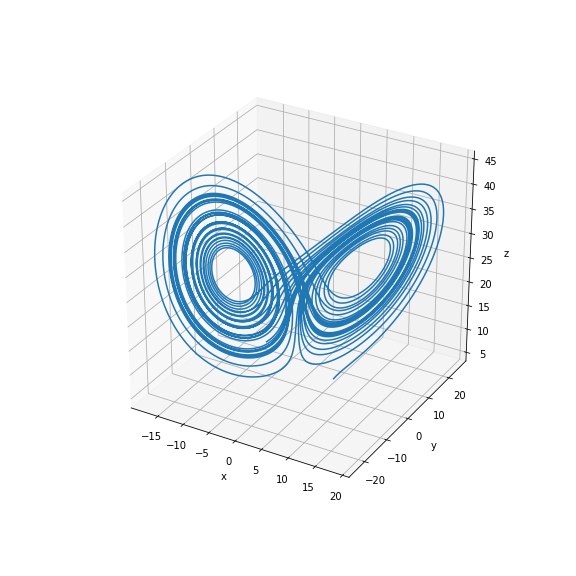

In [3]:
def lorenz(state, t, rho, sigma, beta):
    x, y, z = state  # unpack the state vector
    
    # derivatives
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    
    return dx, dy, dz

# Define params
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

params = (rho, sigma, beta)

# Set initial conditions
state_0 = [5.0, 5.0, 4.0]

# Time vector
t = np.arange(0.0, 40.0, 0.001)

# Integrate
states = odeint(lorenz, state_0, t, args = params)

# Plot
fig = plt.figure(figsize = (8,8))
ax = fig.gca(projection = '3d')
ax.plot(states[:,0], states[:,1], states[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()